# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information from about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

The dataset has 110527 rows and 14 columns.


**Columns**
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment 
- Gender: Male or Female
- ScheduledDay: The day the patient set up their appointment 
- AppointmentDay: The day of the actual appointment, when they have to visit the doctor 
- Age: How old is the patient 
- Neighbourhood: Location of the hospital 
- Scholarship: Whether or not the patient is enrolled in Brasilian welfare program
- Hipertension: Wether the patient is hypertensive or not 
- Diabetes: Wether the patient is diabetic or not 
- Alcoholism: Wether the patient drink or not 
- Handcap: Wether the patient physically challenged or not, and to waht extent
- SMS_received: Wether the patient recieve sms or not
- No-show: Wether the patient show up for the appointment or not, No if the pateint show, Yes if the parent doesn't 



### Question(s) for Analysis

- Research Question 1 (How many patients do show up?)
- Research Question 2 (How many female patients do we have compare to male?)
- Research Question 3 (How many male patients do show up compare to female?)
- Research Question 4 (Is there a difference in the age distribution of patients that show and those that do not?)
- Research Question 5 (Does scholarship affect show up?)
- Research Question 6 (Does SMS affect show up?)
- Research Question 7 (Does being hypertensive affect show up?)
- Research Question 8 (Does being diabetic affect show up?)
- Research Question 9 (Does Alcoholism affect show up?)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import datetime as dt
from datetime import timedelta

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv') # load the dataset
df.head(3)

# To check for the first few rows of my data and ensure that the columns are shown as expected

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
df.info() # Data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**This provides a brief overview of the dataset**

- The dataset has 110527 rows and 14 columns.
- All of the columns are completely filled without no missing value.
- The columns are in float, int and string data types

In [5]:
# columns in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- The columns look good but I would like to rename to lower case and replace the dash to underscore
- Hipertension and Handcap will be changed to the correct spellings

In [6]:
# Statistical description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that there is a negative value for age which needs to be changed

Also, the maximum age is 115 which looks like an outlier

In [7]:
# Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing value

In [8]:
# Check for duplicate values
df.duplicated().sum()

0

There is no duplicate rows


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [10]:
# Converting the column names to lower case and replacing the dash with underscore
df.rename(columns=(lambda x: x.strip().lower().replace('-', '_')), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

The column names have been converted to lower case and the dash in no-show has been converted to underscore (no_show)

In [11]:
# Renaming handcap and hipertension
df.rename(columns=({'handcap':'handicap', 'hipertension': 'hypertension'}), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

The two column names have been corrected.

In [12]:
df.age.head()

0    62
1    56
2    62
3     8
4    56
Name: age, dtype: int64

In [13]:
# I will make the age column be between 0 and 95
# df.age = df.age.apply(lambda x: 0 if x <0 else 95  if x > 95 else x ) # this is a lambda function


# This is a function that fills the negative age value with 0 and make sure the maximum value is 95.

def agg(x):
    if x <0:
        return 0
    elif x > 95:
        return 95
    else:
        return x
df['age'] =  df.age.apply(agg)

In [14]:
df.age.describe()

count    110527.000000
mean         37.087119
std          23.105313
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          95.000000
Name: age, dtype: float64

Now the minimum age is 0 and the maximum age is 95

In [15]:
# pd.to_datetime(df['scheduledday']).dt.date

In [16]:
# I will like to convert the 'scheduledday' and 'appointmentday' to datetime object to be able to extract 
# the difference between the two days
# Also, the particular day of appointment
df.appointmentday = pd.to_datetime(df['appointmentday']).dt.date
df.scheduledday = pd.to_datetime(df['scheduledday']).dt.date
df['day_interval'] = ((df.appointmentday - df.scheduledday)/timedelta(days=1)).astype(int)
df['day'] = pd.to_datetime(df['appointmentday']).dt.day
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_interval,day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,29
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,29
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,29


A new column was created as the difference between the appointment and the schedule date

A new column was also created to know the exact day of appointment

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### Research Question 1 (How many patients do show up?)

In [17]:
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

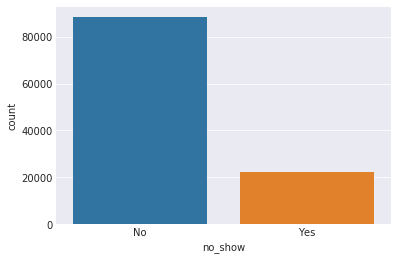

In [18]:
sns.countplot(df.no_show)

About 80% of the patients actually show up

### Research Question 2 (How many female patients do we have compare to male?)

In [19]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

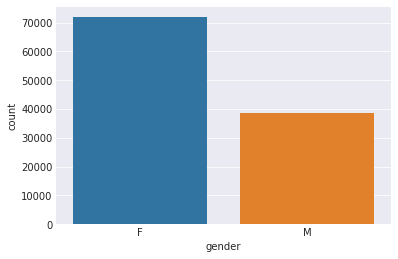

In [20]:
sns.countplot(df.gender)

About 70% of the patients are females, meaning that females tend to take care of their health than males

### Research Question 3 (How many male patients do show up compare to female?)

In [21]:
df.groupby(['gender', 'no_show'])['no_show'].count()

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [22]:
print(round(df.query('gender=="M"')['no_show'].value_counts()[0]/df.query('gender=="M"').shape[0] *100),
      '% of male show up', end=' and ' )

print(round(df.query('gender=="M"')['no_show'].value_counts()[1]/df.query('gender=="M"').shape[0] *100),
      '% of male do not show up')

80.0 % of male show up and 20.0 % of male do not show up


In [23]:
print(round(df.query('gender=="F"')['no_show'].value_counts()[0]/df.query('gender=="F"').shape[0] *100),
      '% of female show up', end=' and ' )

print(round(df.query('gender=="F"')['no_show'].value_counts()[1]/df.query('gender=="F"').shape[0] *100),
      '% of female do not  show up')

80.0 % of female show up and 20.0 % of female do not  show up


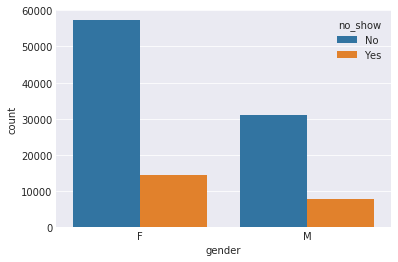

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sns.countplot(x='gender', hue='no_show', data=df)

It can be deduced tentatively that the gender of the patients does not matter in showing up or not

### Research Question 4  (Is there a difference in the age distribution of patients that show and those that do not?)

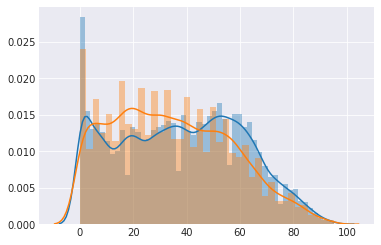

In [25]:
show_no = df.loc[df['no_show'] == 'No']
show_yes = df.loc[df['no_show'] == 'Yes']

sns.distplot(show_no[['age']])
sns.distplot(show_yes[['age']])

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# sns.kdeplot('age', hue='no_show' , data=df,) # data=data, x=col, hue='class'

From the plots above, we can say tentatively that the age distribution for those that show and those that do not is almost the same.

### Research Question 5  (Does scholarship affect show up?)

In [27]:
df.groupby(['scholarship', 'no_show'])['no_show'].count()

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

In [28]:
print(round(df.query('scholarship  ==0')['no_show'].value_counts()[0]/df.query('scholarship  ==0').shape[0] *100),
      '% of patients not on scholarship show up', end=' and ' )

print(round(df.query('scholarship  ==0')['no_show'].value_counts()[1]/df.query('scholarship  ==0').shape[0] *100),
      '% of patients not on scholarship do not show up')

80.0 % of patients not on scholarship show up and 20.0 % of patients not on scholarship do not show up


In [29]:
print(round(df.query('scholarship==1')['no_show'].value_counts()[0]/df.query('scholarship==1').shape[0] *100),
      '% of patients on scholarship show up', end=' and ' )

print(round(df.query('scholarship==1')['no_show'].value_counts()[1]/df.query('scholarship==1').shape[0] *100),
      '% of patients on scholarship do not show up')

76.0 % of patients on scholarship show up and 24.0 % of patients on scholarship do not show up


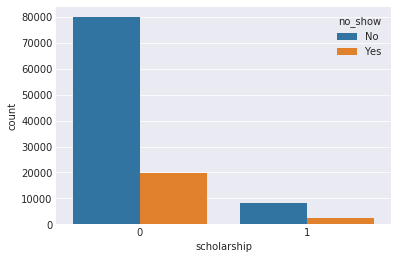

In [30]:
sns.countplot('scholarship', hue='no_show', data=df) 

We can see here that patients not on scholarship tend to show up more often than those on scholarship

They tend to value their money

### Research Question 6  (Does SMS affect show up?)

In [31]:
df.groupby(['sms_received', 'no_show'])['no_show'].count()

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

In [32]:
print(round(df.query('sms_received  ==0')['no_show'].value_counts()[0]/df.query('sms_received  ==0').shape[0] *100),
      '% of patients that do not receive sms show up', end=' and ' )

print(round(df.query('sms_received  ==0')['no_show'].value_counts()[1]/df.query('sms_received  ==0').shape[0] *100),
      '% of patients that do not receive sms do not show up')

83.0 % of patients that do not receive sms show up and 17.0 % of patients that do not receive sms do not show up


In [33]:
print(round(df.query('sms_received==1')['no_show'].value_counts()[0]/df.query('sms_received==1').shape[0] *100),
      '% of patients that receive sms show up', end=' and ' )

print(round(df.query('sms_received==1')['no_show'].value_counts()[1]/df.query('sms_received==1').shape[0] *100),
      '% of patients that receive sms do not show up')

72.0 % of patients that receive sms show up and 28.0 % of patients that receive sms do not show up


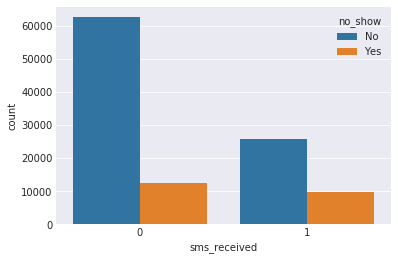

In [34]:
sns.countplot('sms_received', hue='no_show', data=df) 

We can see here that sms reminder doesn't actually seem to have positive impact on show up rate

We see that majority of those that do not recieve sms show up compare to those that do

### Research Question 7  (Does being hypertensive affect show up?)

In [35]:
df.groupby(['hypertension', 'no_show'])['no_show'].count()

hypertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: no_show, dtype: int64

In [36]:
print(round(df.query('hypertension  ==0')['no_show'].value_counts()[0]/df.query('hypertension  ==0').shape[0] *100),
      '% of patients  that are not hypertensive show up', end=' and ' )

print(round(df.query('hypertension  ==0')['no_show'].value_counts()[1]/df.query('hypertension  ==0').shape[0] *100),
      '% of patients that are not hypetensive  do not show up')

79.0 % of patients  that are not hypertensive show up and 21.0 % of patients that are not hypetensive  do not show up


In [37]:
print(round(df.query('hypertension==1')['no_show'].value_counts()[0]/df.query('hypertension==1').shape[0] *100),
      '% of patients that are hypertensive show up', end=' and ' )

print(round(df.query('hypertension==1')['no_show'].value_counts()[1]/df.query('hypertension==1').shape[0] *100),
      '% of patients that are hypertensive do not show up')

83.0 % of patients that are hypertensive show up and 17.0 % of patients that are hypertensive do not show up


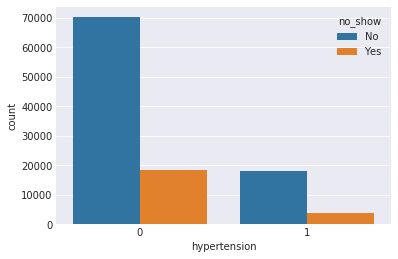

In [38]:
sns.countplot('hypertension', hue='no_show', data=df) 

We can see here that hypertensive patients tend to show up more

### Research Question 8  (Does being diabetic affect show up?)

In [39]:
df.groupby(['diabetes', 'no_show'])['no_show'].count()

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: no_show, dtype: int64

In [40]:
print(round(df.query('diabetes  ==0')['no_show'].value_counts()[0]/df.query('diabetes  ==0').shape[0] *100),
      '% of patients that are not diabetic show up', end=' and ' )

print(round(df.query('diabetes  ==0')['no_show'].value_counts()[1]/df.query('diabetes  ==0').shape[0] *100),
      '% of patients  that are not diabetic do not show up')

80.0 % of patients that are not diabetic show up and 20.0 % of patients  that are not diabetic do not show up


In [41]:
print(round(df.query('diabetes==1')['no_show'].value_counts()[0]/df.query('diabetes==1').shape[0] *100),
      '% of patients  that are diabetic show up', end=' and ' )

print(round(df.query('diabetes==1')['no_show'].value_counts()[1]/df.query('diabetes==1').shape[0] *100),
      '% of patients that  that are diabetic  do not show up')

82.0 % of patients  that are diabetic show up and 18.0 % of patients that  that are diabetic  do not show up


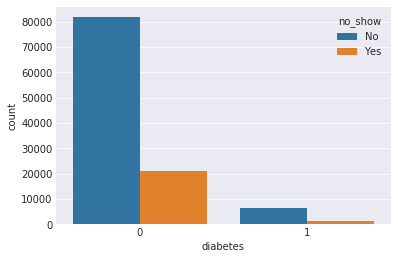

In [42]:
sns.countplot('diabetes', hue='no_show', data=df) 

We can see here that diabetic patients tend to show up more

### Research Question 9  (Does Alcoholism affect show up?)

In [43]:
df.groupby(['alcoholism', 'no_show'])['no_show'].count()

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: no_show, dtype: int64

In [44]:
print(round(df.query('alcoholism  ==0')['no_show'].value_counts()[0]/df.query('alcoholism  ==0').shape[0] *100),
      '% of patients  that do not drink alcohol show up', end=' and ' )

print(round(df.query('alcoholism  ==0')['no_show'].value_counts()[1]/df.query('alcoholism  ==0').shape[0] *100),
      '% of patients that do not drink alcohol do not show up')

80.0 % of patients  that do not drink alcohol show up and 20.0 % of patients that do not drink alcohol do not show up


In [45]:
print(round(df.query('alcoholism==1')['no_show'].value_counts()[0]/df.query('alcoholism==1').shape[0] *100),
      '% of patients that drink alcohol show up', end=' and ' )

print(round(df.query('alcoholism==1')['no_show'].value_counts()[1]/df.query('alcoholism==1').shape[0] *100),
      '% of patients that drink alcohol do not show up')

80.0 % of patients that drink alcohol show up and 20.0 % of patients that drink alcohol do not show up


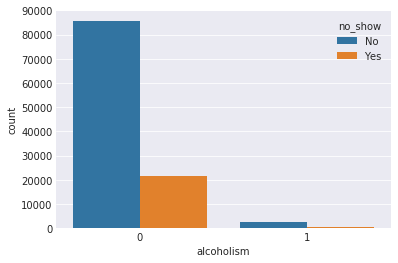

In [46]:
sns.countplot('alcoholism', hue='no_show', data=df) 

Alcoholism seems not to affect show up rate

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# Conclusions

- A larger percentage of patients actually do show up (~ 80%)
- Females tend to take care of their health more than males
- Seems show up rate for male and female is the same
- Age distribution for show up and no show tends to look alike
- Patients that are not on scholarship tends to value their money and show up more than those on scholarship
- Seems sms doesn't really affect the show up rate positively
- Hypertensive and diabetic patients tend to show up more than non-hypertensive and non-diabetic patients
- Alcoholism tend to have no effect on show up rate


## Limitation
All the findings above are tentative until approriate statistical testings are carried out to verify the hypothesis.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0